# Document Classification in multiple ways

Document Classification is aimed to assign a document to one or more classes or categories. This classification has been applied to many fields, including news classification, spam filtering and sentiment analysis. One traditional way is called the Rule-based methods, which is based on a complex, artificial set of rules that requires human to participate in building, revising and updating rules. It has huge limitation on applying to different conditions and costs a lot of time and investment. With the development of technology, there are some automatic document classification techniques, which are based on machine learning and data driven methods. In this article, I will focus on exploring the application of Naive Bayes, Support Vector Machines, and Neutral Network on document classification.

## Naive Bayes Classifier

Naive Bayes is based on the independence assumptions of Bayes’ theorem. Simply, for a given input, Bayes’ theorem is used to find the output with the maximum posterior probability $P(Y|X)$, regardless any possible correlations between the features $X$. 

The aim of the classifier is to find the $Y$ which could get th maximum of $P(Y|X)$. 

**Assumptions:** 

· $X$ is the input observation  
· $Y$ is the target(class) variable  
· $R^n$ is a set of n-dimensional vectors  
· $X \subseteq R^n$ indicates that each observation has $n$ features.  
· $T = \{(x_1,y_1),..., (x_n, y_n)\}$ is the train set.

Based on the Bayes' thorem, given the featurs of the observation $x$, the probability of gitting $y_k$ is

$$
P(Y = y_k|X = x) = \frac{P(Y = y_k)P(X = x|Y = y_k)}{\sum_j{P(X = x|Y = y_j)}P(Y = y_j)}
$$



Under the independence assumptions, the conditional distribution ovr the class varirable $Y$ is 

$$
P(Y = y_k|X = x) = \frac{P(Y = y_k)\prod_{i=1}^n{P(X = x|Y = y_k)}}{\sum_jP(Y = y_j)\prod_{i=1}^n{P(X = x|Y = y_j)}}
$$

If $P(Y = y_k|X = x) = max\{P(y_1|x),...,P(y_n|x)\}$, then the observation $x \in y_k$. Thus, the classification model could be expressed by

$$
\begin{aligned} 
y &= argmax_{y_k}P(Y = y_k|X = x) \\ 
&= argmax_{y_k}\frac{P(Y = y_k)\prod_{i=1}^n{P(X = x|Y = y_k)}}{\sum_jP(Y = y_j)\prod_{i=1}^n{P(X = x|Y = y_j)}}
\end{aligned}
$$

Because the equation is not dependent on the y_j, we could simplify the equation to

$$
\begin{aligned} 
y &= argmax_{y_k}P(Y=y_k)\prod_{i=1}^n{P(X = x|Y = y_k)}
\end{aligned}
$$

**Application**

One significant attribute of text data is its large dimension. For example, a document may have thousands of wards. However, documents with different types or themes may have a large gap in terms of vocabulary, so the words appearing order can be ignored. The Naive Bayes method can be used to solve the document classification problem based on the hypothesis that every word in the document appears independently. I would like to show you how it works by the following example:

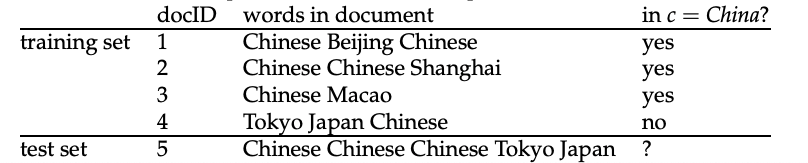

Now, the aim is to predict if the data in test set is in the class `China`. Firstly, I could get the prior probabilities:

$$P(c) = 3/4, P(\bar c) = 1/4$$

Notice that, `Tokyo`, `Japan` is not appearing in the training set in class `China`, so the conditional probability of them would be 0, which might affect the prediction on test set. Thus, Laplace Smoothing is a good choice to calculate the conditional probabilities of each word.


$$P(Chinese|c)=(5+1)/(8+6)=3/7\\
P(Tokyo|c)=P(Japan|c)=(0+1)/(8+6)=1/14\\
P(Chinese|\bar c)=(1+1)/(3+6)=2/9 \\ 
P(Tokyo|\bar c)=P(Japan|\bar c)=(1+1)/(3+6)=2/9$$

Then, we could get:

$$\begin{aligned} 
P(c|d5)  &\propto  P(c)⋅P(Chinese|c)3⋅P(Tokyo|c)⋅P(Japan|c) \\
&= \frac{3}{4} · (\frac{3}{7})^3 · \frac{1}{14} · \frac{1}{14} \\
& \approx 0.0003
\end{aligned}
$$


$$\begin{aligned} 
P(c|d5)  &\propto  P(\bar c)⋅P(Chinese|\bar c)3⋅P(Tokyo|\bar c)⋅P(Japan|\bar c) \\
&= \frac{1}{4} · (\frac{2}{9})^3 · \frac{2}{9} · \frac{2}{9} \\
& \approx 0.0001
\end{aligned}
$$

Thus, the Naive Bayes classifier assigns the test document to $c = China$. The reason for this classification decision is that the three occurrences of the positive indicator Chinese in d5 outweigh the occurrences of the two negative indicators Japan and Tokyo.

Naive Bayes classifier is based on Bayes’ theorem and adds independent assumption of each feature, which greatly reduces the parameter hypothesis space and simplifies the process of learning and prediction. Even the assumption of the Naive Bayes classifier seems to be simple, the performance on prediction is still good. One explanation from the article, `The Optimality of Naïve Bayes`, is that “naive Bayes may change the posterior probabilities of each class, but the class with the maximum posterior probability is often unchanged.” Although the correlation between features may be uniformly distributed in different categories, the correlation between different features may cancel each other out. Therefore, the classification could be still correct.

## Support Vector Machine

Support Vector Machine is a popular method to do classification. It is based on Structural Risk Minimization principle, which would maximize the margin of decision hyperplane to reduce the risk of misclassification.

When SVM applies to document classification, it would compresses the data set into support vector set, to learn the decision function. It is essentially a two-class classifier, which separate the data set by a linear separator, and then could be extended to multi-class data set and non-linear cases. In this section, I would start from the advantages of SVM in document classification, and then give a linearly separable case to illustrate the steps, and finaly discuss the feasibility in document classification with several categories.

**The advantages of SVM to do document classification**

SVM measures the complexity of the data set based on the hyperplane with which it separates the data, not the number of features. 

For example, if the data set with many features could be separate by one feature, then all the other features could be map to 0 and one point on the line could separate all the data:

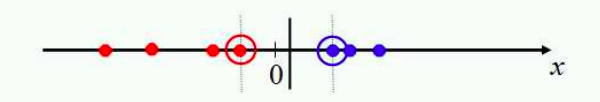

If the data set with only one feature is not linearly separable, then all the data need to be projected to higher dimensional until they can be linearly separated.

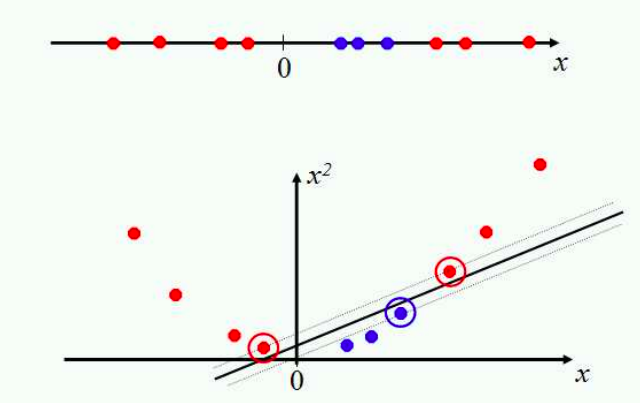

Words in documents could be consider as features by vectoring the words or calculating their tf-idf , so that one document could have a lot of features. Also, text is often linearly separable. Using SVM could lower the parameters dimension which needs to be considered and increase the efficiency of doing classification. 

### linearly separable case

In two-class problems, there could be a lot of possible linear separatots. 

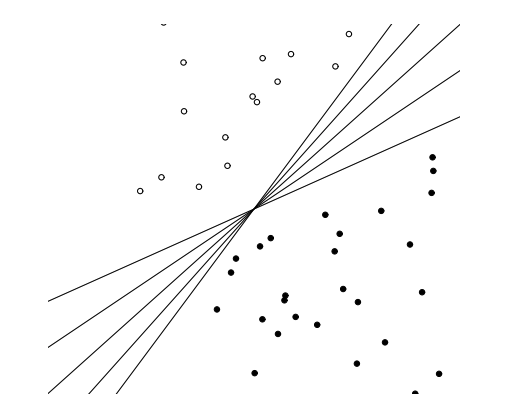

To determine the best decision surface, SVM defines a hyperplane by the following variables: 

· $b$ is an intercept term   
· $w$ is the weight vector which is perpendicular to the hyperplane  
· $\{(x_i,y_i)\}$ is the training set, where $x_i$ is a point and $y_i$ is the class lable to it  

All points x on the hyperplane satisfy $w′x = -b$, and the two classes are always $+1$ and $-1$. Then the linear classifier could be defined as:

$$f(x) = sign(w′x+b)$$

When $w′x_i+b \leq -1$, $y_i =-1$; when $w′x_i+b \geq 1$, $y_i =1$. The spacing between consecutive integer level sets is $1/|w|$. Minimizing $|w|$ would maximize the margin of the hyperplane to get the best SVM model.

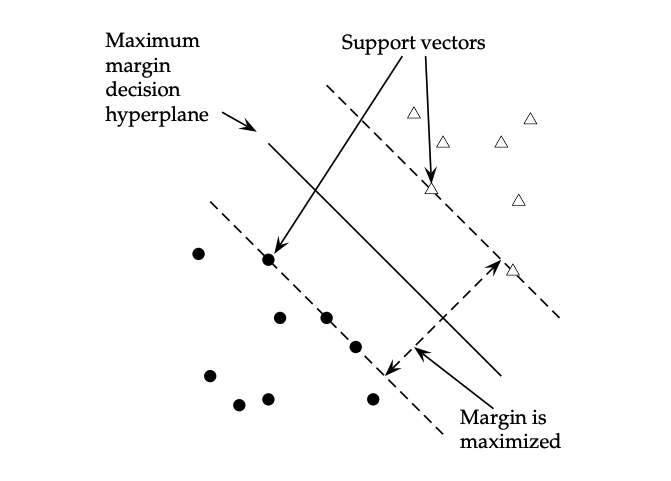

I would agiain, use previous case to illustrate how SVM works in real cases. Firstly, I transfer the table into a pandas dataframe.

In [1]:
import pandas as pd
d = {'words':['Chinese Beijing Chinese', 'Chinese Chinese Shanghai', 'Chinese Macao', 'Tokyo Japan Chinese'],
         'c': ['yes','yes','yes','no']}
train_set =pd.DataFrame(data=d)
train_set

,words,c
0,Chinese Beijing Chinese,yes
1,Chinese Chinese Shanghai,yes
2,Chinese Macao,yes
3,Tokyo Japan Chinese,no


Then, convert the data set into vectors by using tf-idf

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer()
tf_train_data = tfidf_transformer.fit_transform(train_set.words)

In [3]:
import numpy as np
tf_train_data.toarray()

array([[0.69183461, 0.722056  , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.722056  , 0.        , 0.        , 0.69183461,
        0.        ],
       [0.        , 0.46263733, 0.        , 0.88654763, 0.        ,
        0.        ],
       [0.        , 0.34618161, 0.66338461, 0.        , 0.        ,
        0.66338461]])

Finally, train the SVM model and do prediction on the test set. The result of the model matches the result of Naive Bayes Classifier.

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear').fit(tf_train_data, train_set.c)
test_set = ['Chinese Chinese Chinese Tokyo Japan']
tf_docs_new = tfidf_transformer.transform(test_set)
predicted = clf.predict(tf_docs_new)
predicted

array(['yes'], dtype=object)

### Multi-class classification

In reality, a document with high dimensional features could belong to several classes. When doing document classification, people expect to have a classifier which could deal with multi-class classification. It could be done by constructing several binary classifiers. Traditionally, there are two ways:

1.`one-versus-rest classifiers`: also called “one-versus-all” or OVA classification. When training the classifier, the samples of a certain category, c_k, were classified into one category and the remaining samples into another. In this way, to classify the samples of k categories would require k SVMs, and the classifier would assign the data in test set to the class which gives it largest margin.

2.`one-versus-one classifiers`: it builds a SVM between samples in any two categories. To classify samples of k categories would require to design k(k-1)/2 SVMs. When doing classification for an unseen sample in test set, the category with the most votes would be assigned to the sample.

One experiment from the book, `Introduction to Information Retrieval`, shows the success results from Joachims(1998) of using SVM to do multiclass document classification. 

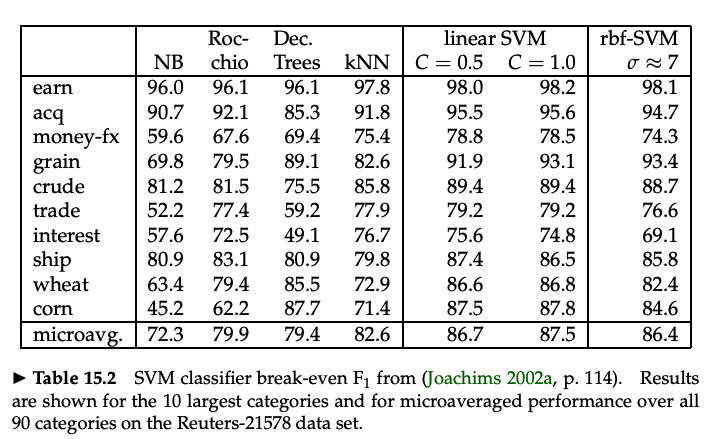

## Neutral Network

Naive Bayes Classifier and Support Vector Machine are both based on statistic models which require elaborate feature engineering. Neural Network uses the middle layer to get the appropriate feature automatically, so that the data input could be more primitive and dense, and keep the n-dimensional array structure in the network. It could not only consider the word as a feature, but also add the words relationship in the context as a feature to do classification.

### Neural Network theorem

Neutral Network is designed to be similar to nervous systems, which are used to discover complex patterns and relationships in tagged data. A shallow neural network consists of three layers of neurons: input layer, hidden layer and output layer. In document classification, the input would be the word vectors matrix which requires data preprocessing, the output layer would contains all the possible categories, and the input data would be transformed several times through the hidden layers to get the final classification.

The idea is for each word in the document to generate a word vector, and then merge it into the matrix according to the sentence. This word vector matrix would be put into the neural network to classify the document. The simple neural network model could be built to predict previous example as follows:

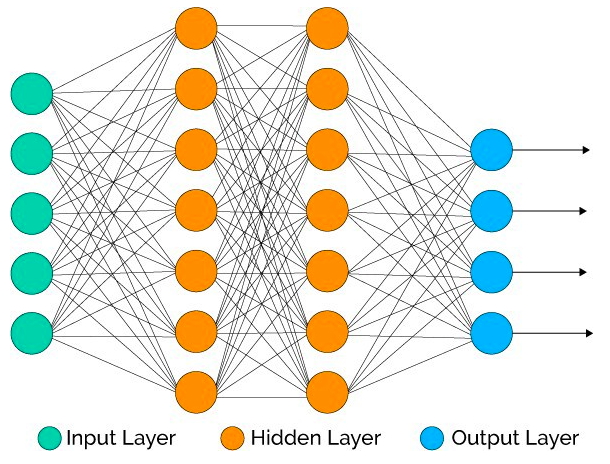

· Firslty, import Keras package and the training set shows as below:

In [5]:
import keras
from keras.layers import Dense
from keras.models import Sequential
train_set

,words,c
0,Chinese Beijing Chinese,yes
1,Chinese Chinese Shanghai,yes
2,Chinese Macao,yes
3,Tokyo Japan Chinese,no


· Then, preprocess the data, converting the target label into 1 and 0, and convert text data into vectors

In [6]:
target = [[1,0] if i == 'yes' else [0,1] for i in train_set.c.values ]
target

[[1, 0], [1, 0], [1, 0], [0, 1]]

In [7]:
target = np.array(target)
tf_train_data.toarray()[0]

array([0.69183461, 0.722056  , 0.        , 0.        , 0.        ,
       0.        ])

In [8]:
test_set = ['Chinese Chinese Chinese Tokyo Japan']
tf_docs_new = tfidf_transformer.transform(test_set)
tf_docs_new.toarray()

array([[0.       , 0.7420575, 0.4739993, 0.       , 0.       , 0.4739993]])

· Building the model with two hidden layer and one output layer, compiling the model by given the optimize method, loss function and evaluation metric. Fitting the training data into the model.

In [9]:
n_cols = tf_train_data.shape[1]
model = Sequential()

# Add the two hidden layer
model.add(Dense(10, activation='relu', input_dim=n_cols))
model.add(Dense(10, activation='relu'))

# Add the output layer
model.add(Dense(2,activation = 'softmax'))
                
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.fit(tf_train_data.toarray(), target, verbose=False)

· Putting the test data into the model and let it do prediction. The model would return the corresponding probabilities of two classes. 

In [10]:
model.predict(tf_docs_new.toarray())

array([[0.5469802 , 0.45301974]], dtype=float32)

In the results 0.56172836 represents the probability in class 1, corresponding to 'yes' category. Thus, the model gives the same result in previous two models, which classify the test data into `China` category.

### CNN model

Convolution Neural Network is similiar to full coonection neural network. Each layer in CNN is made up of neurons. The difference is, rather than connecting each node in the neural network, only parts of the node is connected between adjacent layers in CNN. Thus, it could extract features in the documents to improve the accuracy in classification problems.

CNN is usually composed of input layer, convolutional layer, pooling layer, full connection layer and softmax layer, which are all in the three dimension. The specific model is like following:

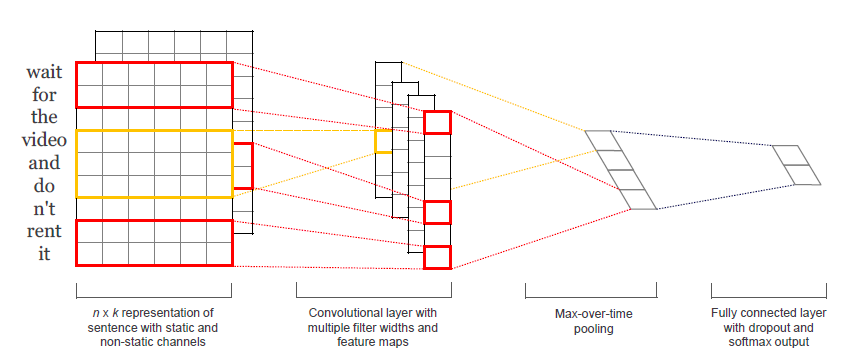

**Input layer:** After the text in the document is passed to the input layer, it would convert to three-dimensional input with shape of $n*k*channel$. 

**Convolutional layer:** Then the input would be put into the convolutional layer. The size of the convolutional layer is $m*k*depth$, where $m$ is the length of the filter, $k$ is the dimension of embedding and $depth$ represents the depth of filter. Using different $m$ would involve different number of words to be convolved as features. For example, if $m = 1$, the convolutiional layer would return unigram feature; if $m = 2$, it would return bigram features. After passing through the convolutional layer, n-gram related features of the original text are extracted.


**Pooling layer:** The max pooling method is used in pooling layer. The filter size of the pooling layer is $convLength *1$, where $convlength$ is  the length of the feature map after convolution of text. After pooling, the dimension of feature map will be reduced to 1, so after pooling, and the vector dimension would be $depth*filterNum$, whcih is the features that represent the whole document.

**Full connection layer and softmax layer:** Finally, by using softmax, we could get the probability vectors representing different categories, and classify the document into the category with highest probability.

## Conclusion

From the above reading, I hope you have an overview about how the three methods work well on document classification. Indeed, the three methods deal with text data with different assumptions and ways. 

Naive Bayes Classifier adds a causation between the inputs and outputs, which indicates the appearence of certain words could lead to the certain probability to put it into certain categories. Thus, it uses prior and posterior probability to do classification and it is easy to intepret. Unlike Naive Bayes, Support Vector Machine has no assumption, and it do classification just based on the data points and the distance between them. The data points would perform differently in higher dimension, and SVMs could separate these points and classify the closer data points into one category. Neutal Network largely depends on machine learning. It assumes there is a linear or non-linear function between the inputs and the outputs. It is hard to intepret because we, as human, cannot understand how machine learns from the data and find the function, which is called the 'black box' problem. Although you could find they all give the same results in my simple example, in reality, the results could be different because of the different ways they use to get the final prediction.

Facing the complex problems and needs in document classification, there are more various ways could be used to do document classification. If you are interested in exploring more details, you could check the sources in my reference.

## Reference

Manning, C. D., Raghavan, P., &amp; Schütze, H. (2008). Introduction to information retrieval. Cambridge: Cambridge University Press.

Yoon Kim. (2014). Convolutional Neural Networks for Sentence Classification